In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/uefa-euro-2024-players/euro2024_players.csv")
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [3]:
print("The total number of rows:",df.shape[0])
print("The total number of columns:",df.shape[1])

The total number of rows: 623
The total number of columns: 10


In [4]:
#Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [5]:
#Numerical statistics
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [6]:
#Checking for null values
rows_having_null_values = df[df.isnull().any(axis=1)]
rows_having_null_values

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
390,Maximilian Entrup,Centre-Forward,26,TSV Hartberg,186,NaN,2,1,2000000,Austria
418,Thomas Kaminski,Goalkeeper,31,Luton Town,190,NaN,1,0,3000000,Belgium
472,Bogdan Racovițan,Centre-Back,24,Raków Częstochowa,187,NaN,2,0,1800000,Romania


There are 3 NaN values in the column: "**Foot**"

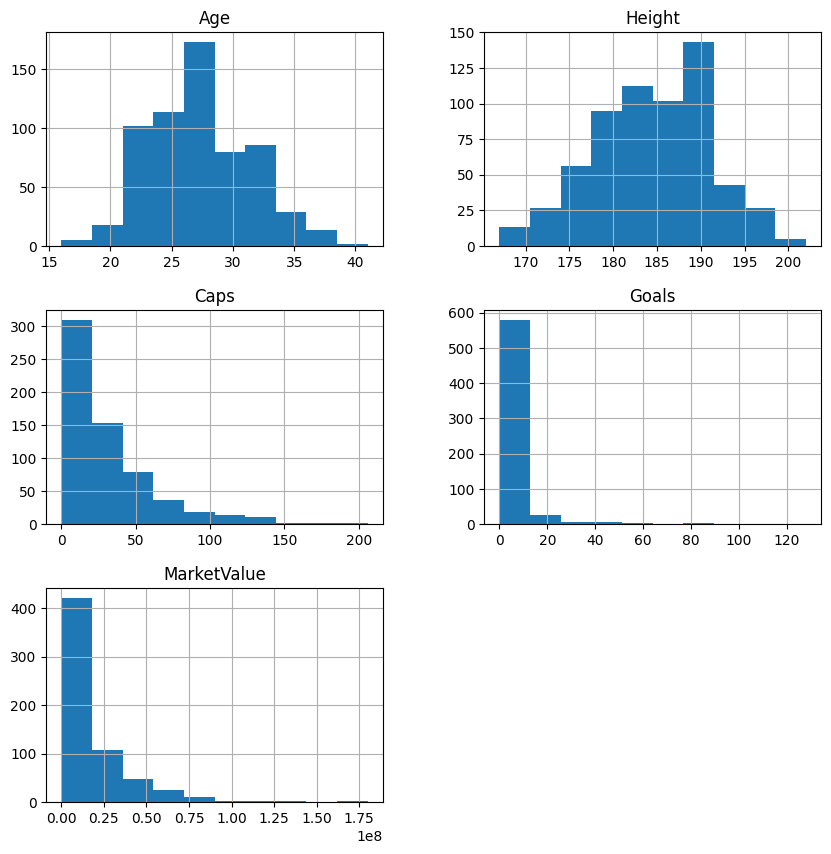

In [7]:
#Data distribution of player age, height, Caps, Goals and market value
df.hist(figsize=(10, 10))
plt.show()


In [8]:
total_number_of_players = df.shape[0]
print("Total number of players in Euro 2024:",total_number_of_players)

Total number of players in Euro 2024: 623


In [9]:
total_number_of_countries = df["Country"].nunique()
print("Total number of countries in Euro 2024:",total_number_of_countries)

Total number of countries in Euro 2024: 24


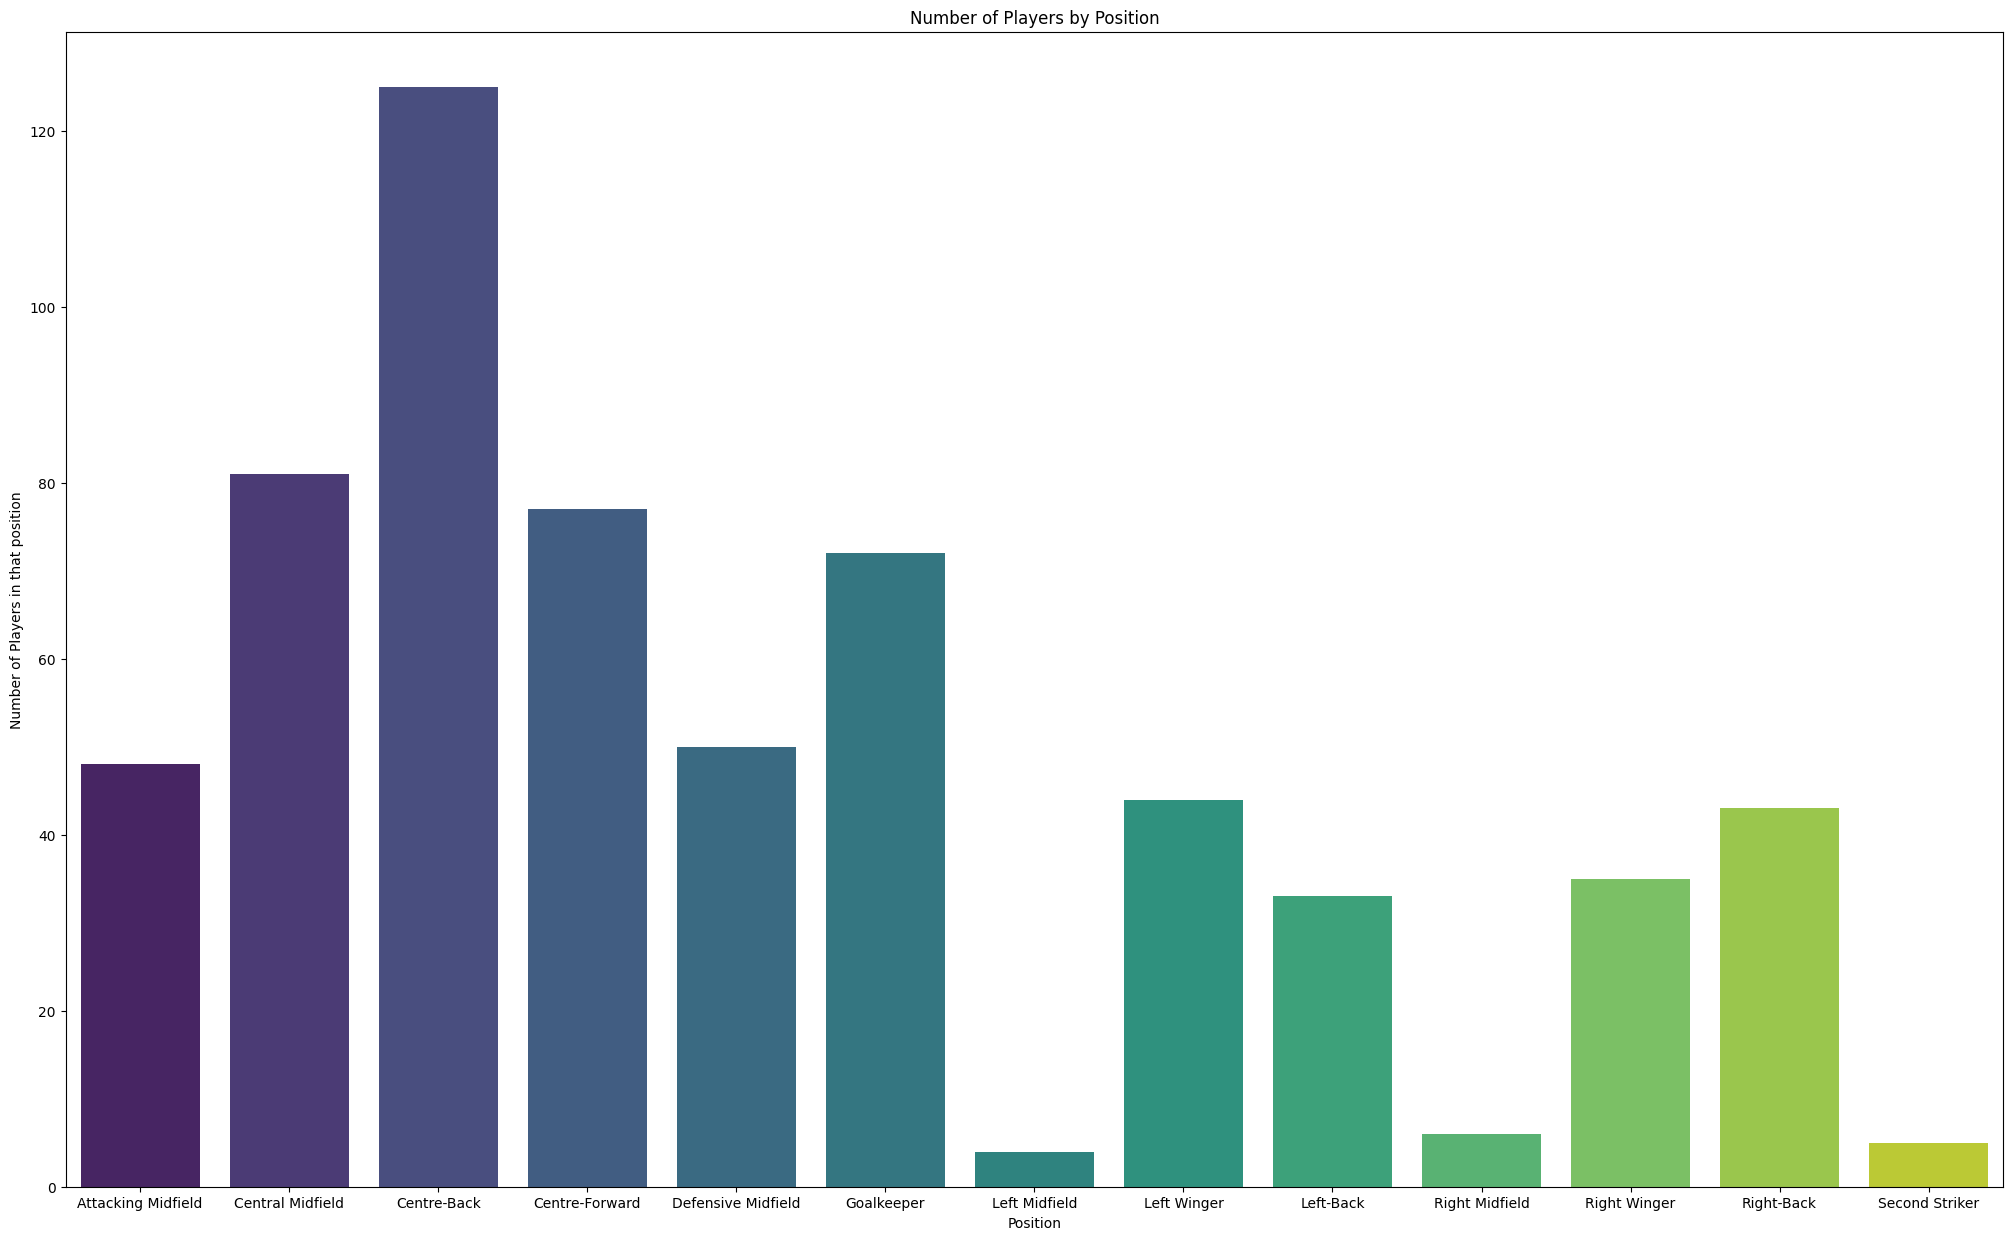

In [10]:
#Players grouped by their positions on the field
players_grouped_by_positions = df.groupby("Position").size().reset_index(name="Count")
plt.figure(figsize=(25,15))
sns.barplot(x='Position', y='Count', data=players_grouped_by_positions, palette='viridis')
plt.xlabel('Position')
plt.ylabel('Number of Players in that position')
plt.title('Number of Players by Position')
plt.show()

Most players are **centre-backs** in Euro 2024

In [11]:
#Top 10 goalscorers
top_10_goalscorers = df.loc[df["Goals"].nlargest(10).index]
top_10_goalscorers.loc[:,["Name","Goals"]]

,Name,Goals
596,Cristiano Ronaldo,128
440,Romelu Lukaku,83
335,Robert Lewandowski,82
257,Harry Kane,63
309,Aleksandar Mitrovic,57
415,Olivier Giroud,57
411,Kylian Mbappé,47
515,Andriy Yarmolenko,46
22,Thomas Müller,45
363,Memphis Depay,45


In [12]:
#Top 10 valuable players
top_10_valuable_players = df.loc[df["MarketValue"].nlargest(10).index]
top_10_valuable_players.loc[:,["Name","MarketValue"]]

,Name,MarketValue
250,Jude Bellingham,180000000
411,Kylian Mbappé,180000000
254,Phil Foden,150000000
255,Bukayo Saka,140000000
17,Florian Wirtz,130000000
18,Jamal Musiala,120000000
115,Rodri,120000000
246,Declan Rice,120000000
257,Harry Kane,100000000
402,Aurélien Tchouaméni,100000000


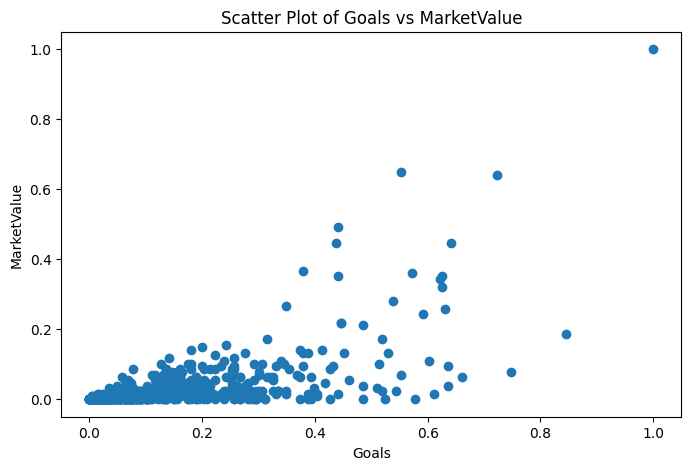

Correlation coefficient between Goals and Market Value is: 0.6361804686083812


In [13]:
#Correlation between goals scored and caps of a player
X = np.array(df["Caps"])
Y = np.array(df["Goals"])

X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))
Y_normalized = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))


plt.figure(figsize=(8, 5))
plt.scatter(X_normalized, Y_normalized)
plt.xlabel('Goals')
plt.ylabel('MarketValue')
plt.title('Scatter Plot of Goals vs MarketValue')
plt.show()

correlation_matrix = np.corrcoef(X_normalized, Y_normalized)

print("Correlation coefficient between Goals and Market Value is:",correlation_matrix[0,1])

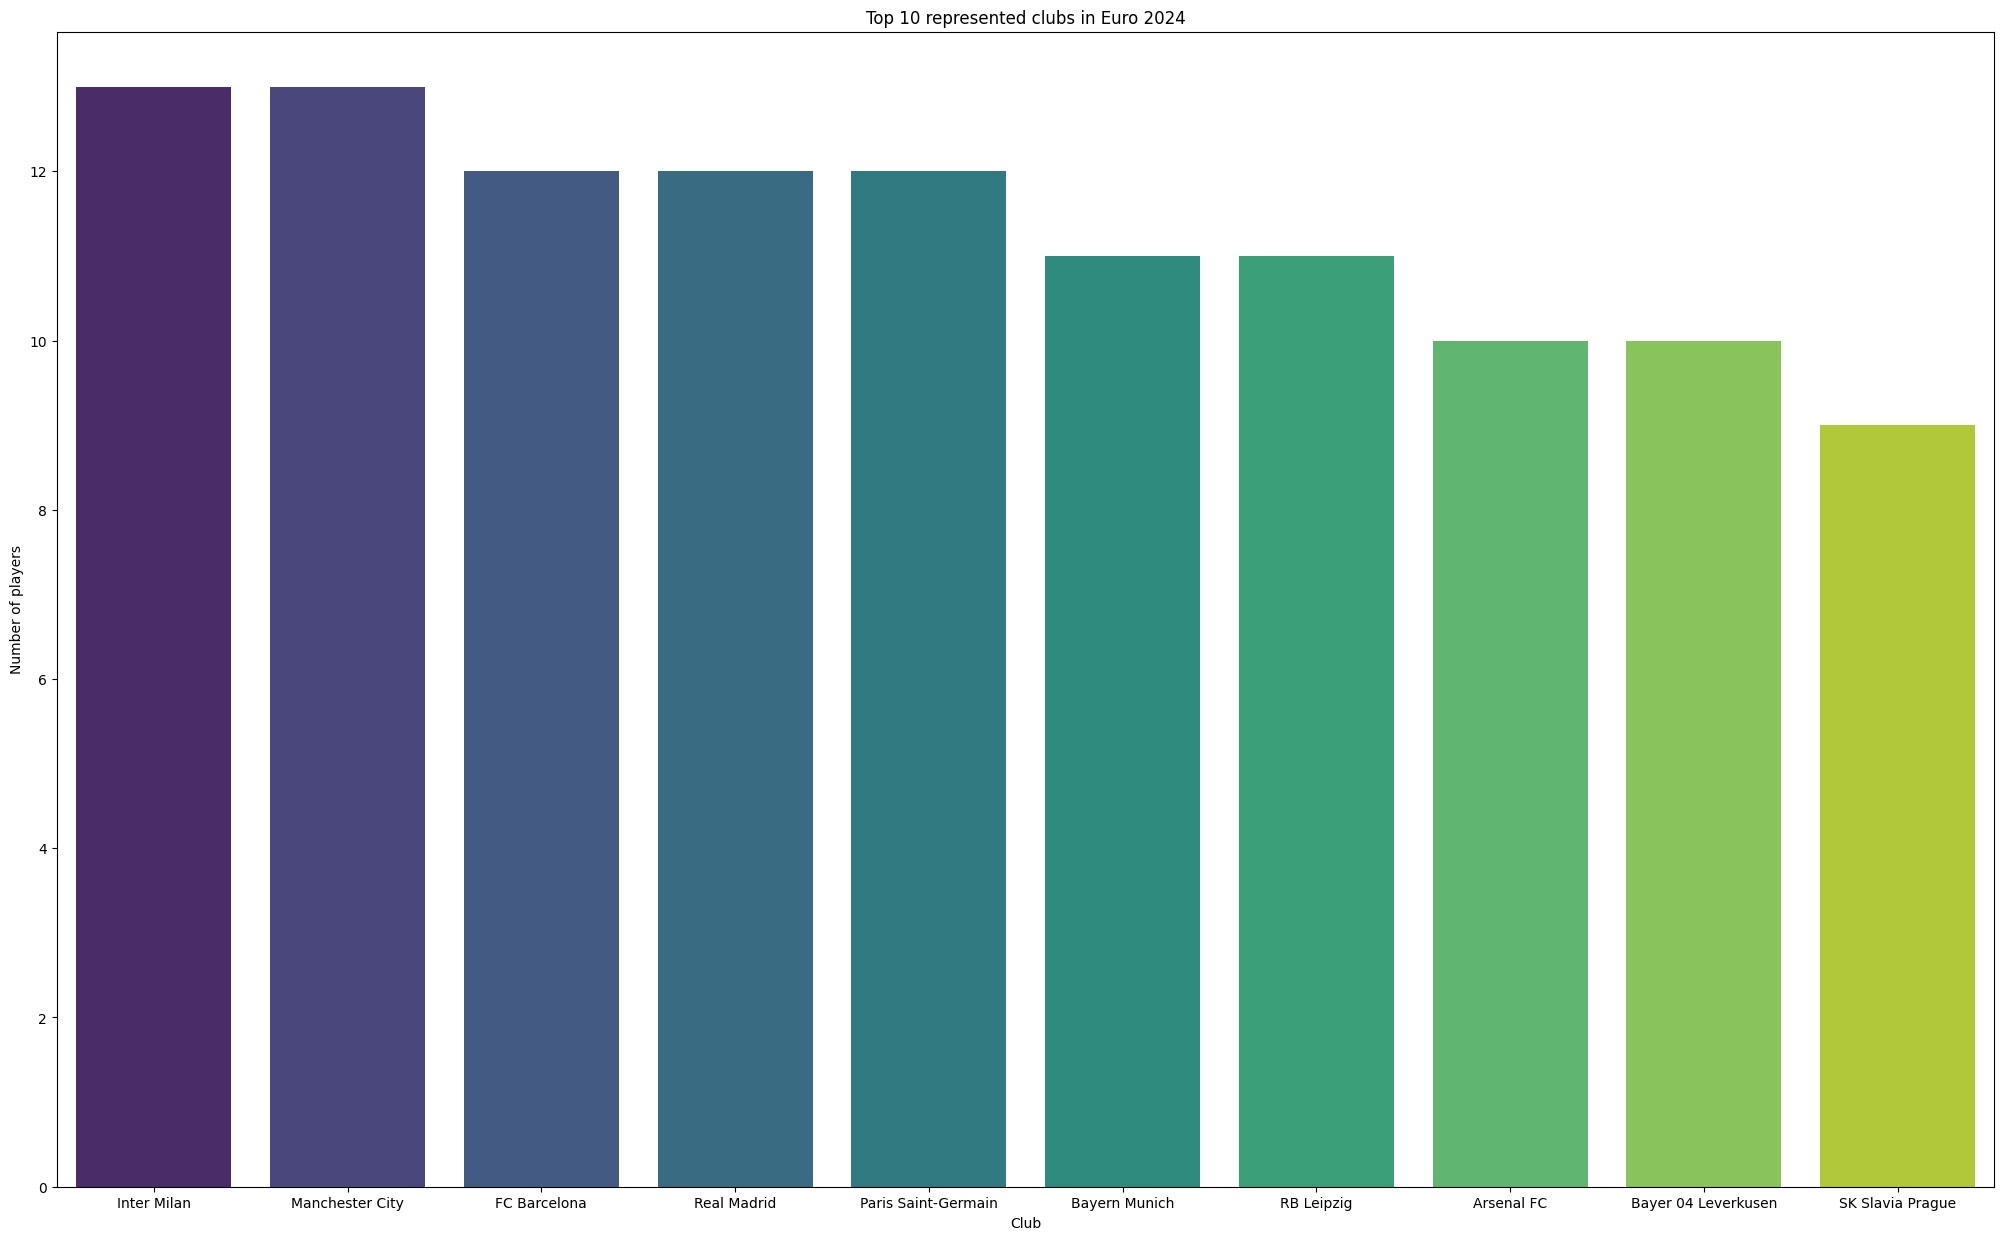

In [14]:
#Top 10 represented clubs in Euro 2024
top10_clubs_to_number_of_players = df.groupby("Club").size().sort_values(ascending=False)[:10]

df_club_to_number_of_players = pd.DataFrame({"Club": top10_clubs_to_number_of_players.index, 
                        "Number of players": top10_clubs_to_number_of_players.values})

plt.figure(figsize=(25,15))
sns.barplot(x='Club', y='Number of players', data=df_club_to_number_of_players, palette='viridis')
plt.xlabel('Club')
plt.ylabel('Number of players')
plt.title('Top 10 represented clubs in Euro 2024')
plt.show()

The most represented club is: **Inter Milan**

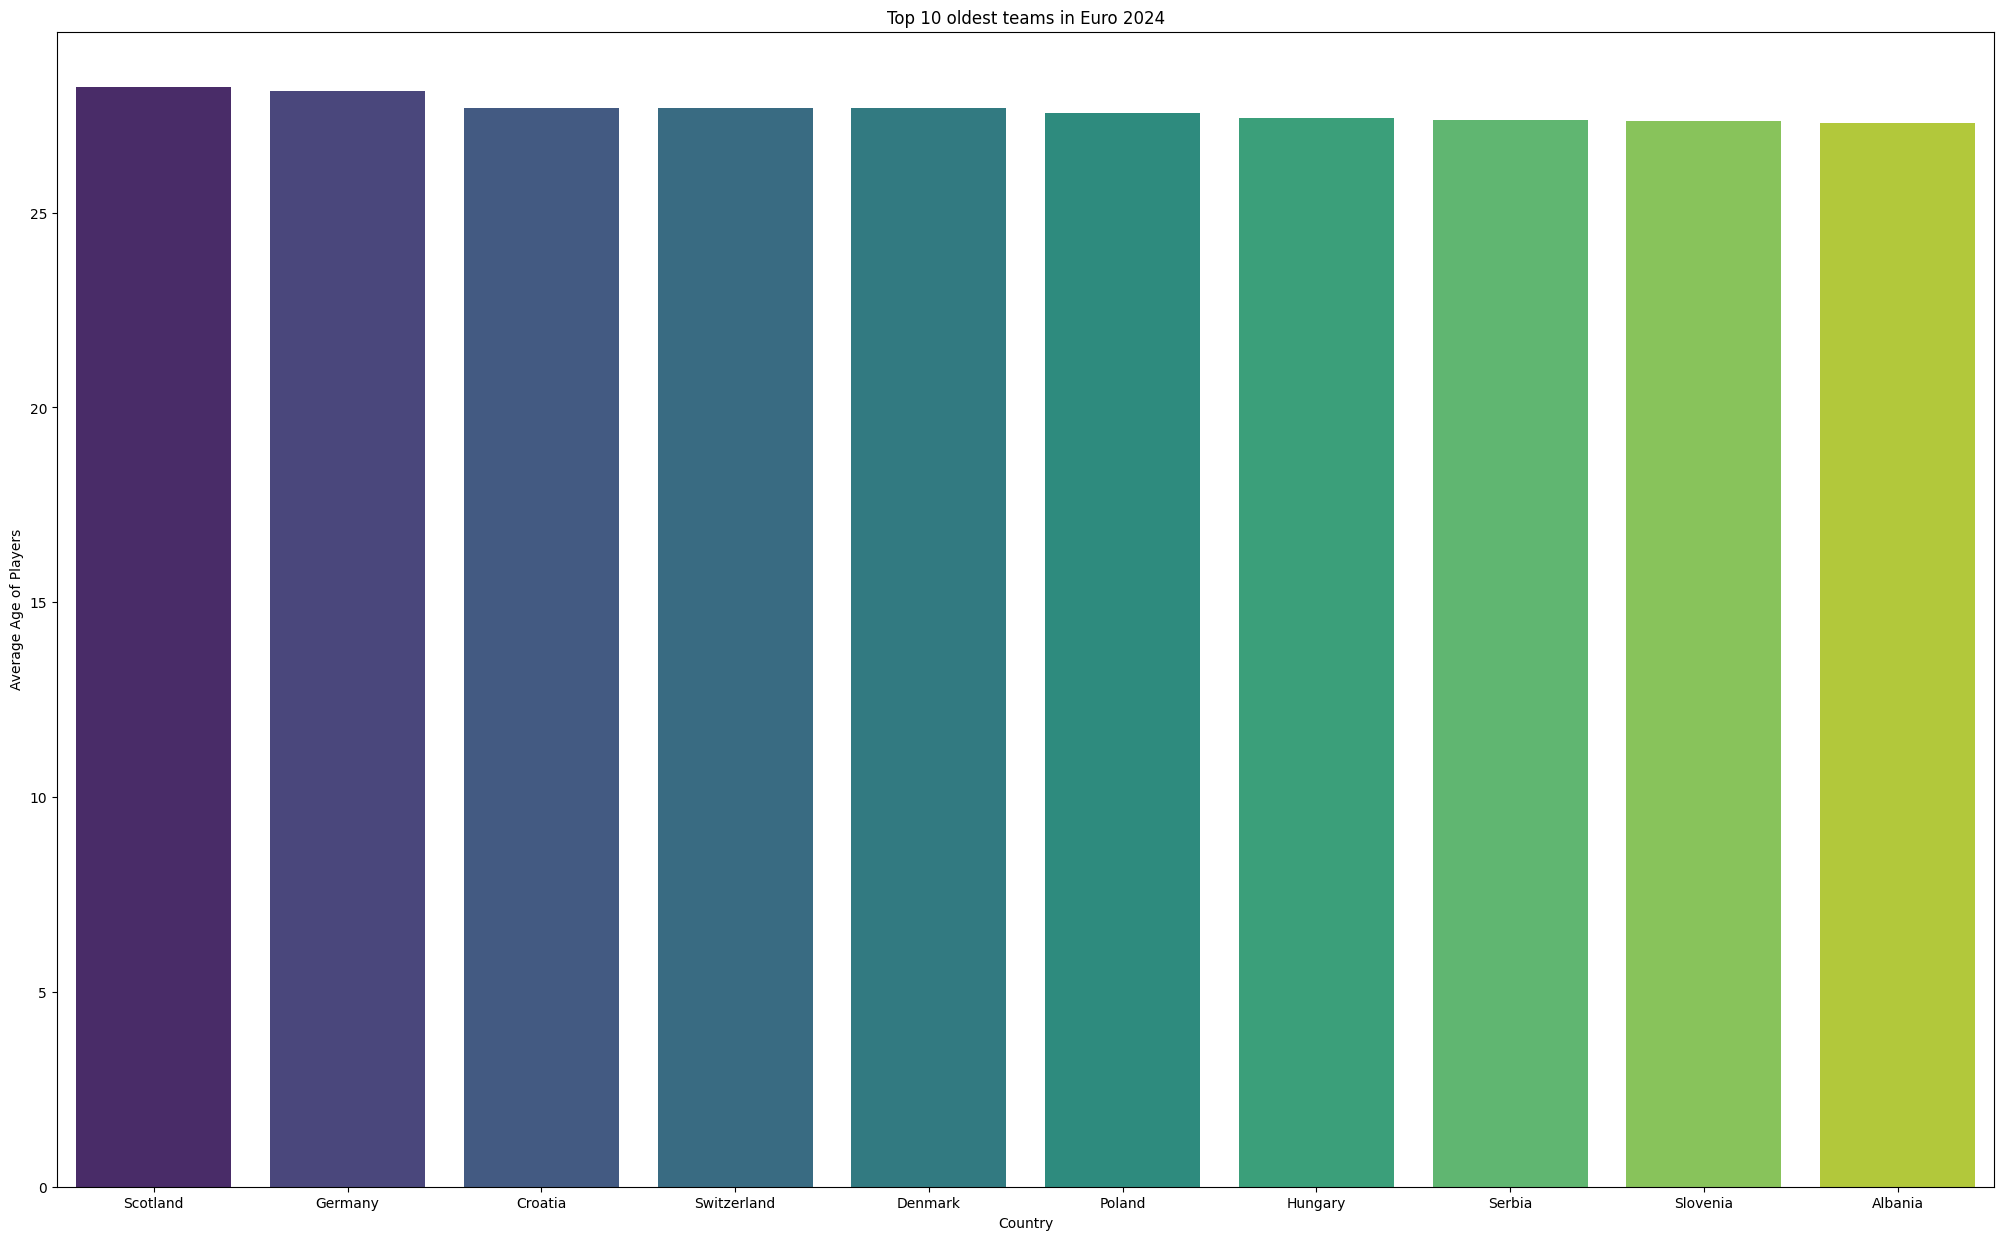

In [15]:
#Teams with the oldest players in Euro 2024
avg_age_of_teams = df.groupby("Country",as_index=False)["Age"].mean()
top_10_oldest_teams = avg_age_of_teams.sort_values(by="Age", ascending=False)[:10]


plt.figure(figsize=(25,15))
sns.barplot(x='Country', y='Age', 
            data=top_10_oldest_teams, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Average Age of Players')
plt.title('Top 10 oldest teams in Euro 2024')
plt.show()

Scotland has the highest "**average age**" in Euro 2024

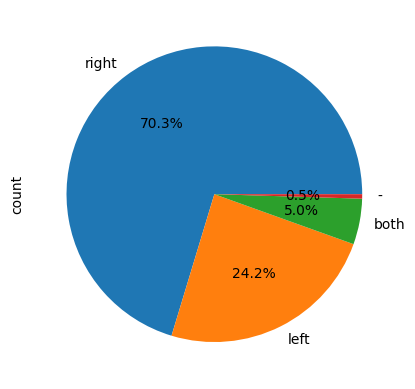

In [16]:
df['Foot'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

* **70.3%** of players are right footed
* **24.2%** of players are left footed
* **5%** of players can play with both feet
* We **don't have "foot preference"** data for **0.5%** of the players